In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('data/processed/happiness_final.csv')
df.head(10)

,Happiness_Rank,Country,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Government_Corruption,Generosity,Year
0,153,Afghanistan,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,2015
1,154,Afghanistan,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2016
2,141,Afghanistan,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2017
3,145,Afghanistan,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,2018
4,154,Afghanistan,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,2019
5,95,Albania,4.959,0.878670,0.804340,0.813250,0.357330,0.064130,0.142720,2015
6,109,Albania,4.655,0.955300,0.501630,0.730070,0.318660,0.053010,0.168400,2016
7,109,Albania,4.644,0.996193,0.803685,0.731160,0.381499,0.039864,0.201313,2017
8,112,Albania,4.586,0.916000,0.817000,0.790000,0.419000,0.032000,0.149000,2018
9,107,Albania,4.719,0.947000,0.848000,0.874000,0.383000,0.027000,0.178000,2019


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Happiness_Rank         782 non-null    int64  
 1   Country                782 non-null    object 
 2   Happiness_Score        782 non-null    float64
 3   GDP_per_Capita         782 non-null    float64
 4   Social_Support         782 non-null    float64
 5   Life_Expectancy        782 non-null    float64
 6   Freedom                782 non-null    float64
 7   Government_Corruption  782 non-null    float64
 8   Generosity             782 non-null    float64
 9   Year                   782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [86]:
df.drop(columns=['Year', 'Happiness_Rank']).describe()

,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Government_Corruption,Generosity
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,5.379018,0.916047,1.078392,0.612416,0.411091,0.125599,0.218576
std,1.127456,0.407340,0.329548,0.248309,0.152880,0.105847,0.122321
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.509750,0.606500,0.869363,0.440183,0.309768,0.054250,0.130000
50%,5.322000,0.982205,1.124735,0.647310,0.431000,0.091033,0.201982
75%,6.189500,1.236187,1.327250,0.808000,0.531000,0.156243,0.278832
max,7.769000,2.096000,1.644000,1.141000,0.724000,0.551910,0.838075


In [88]:
# Configuración estética
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

# **DISTRIBUCIÓN DE VARIABLES CONTINUAS**

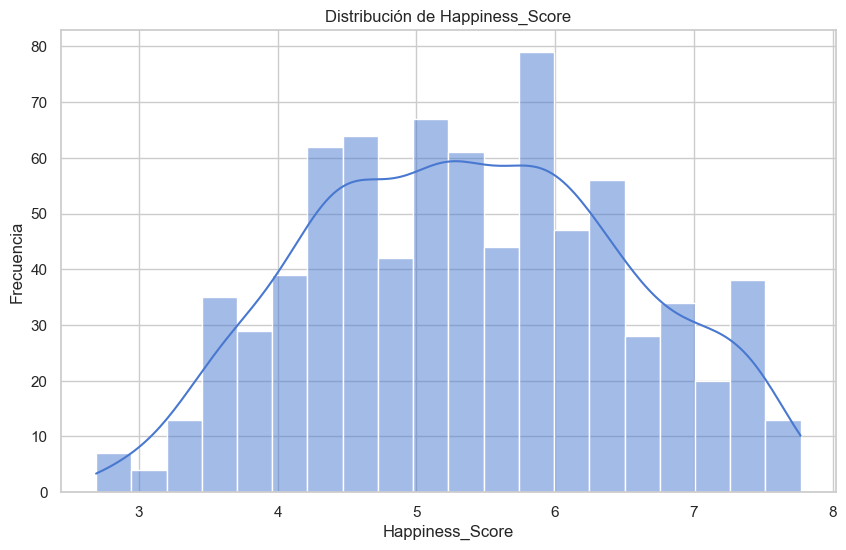

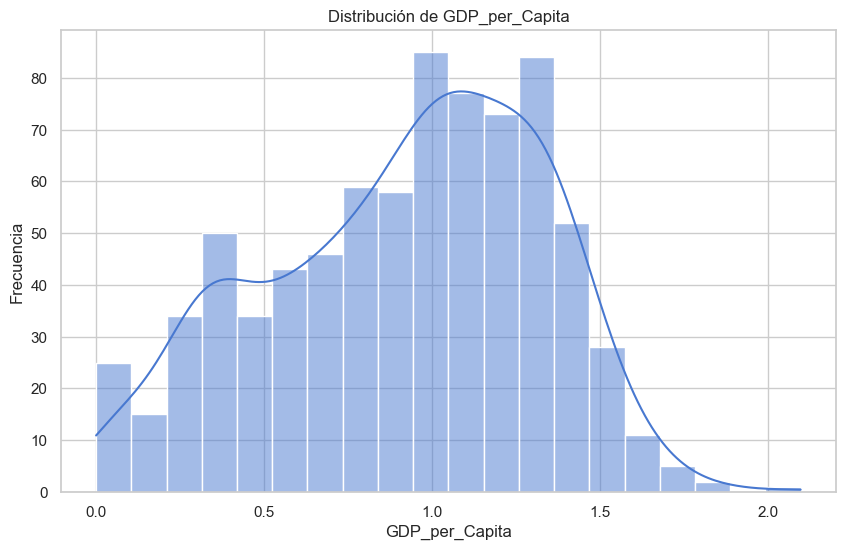

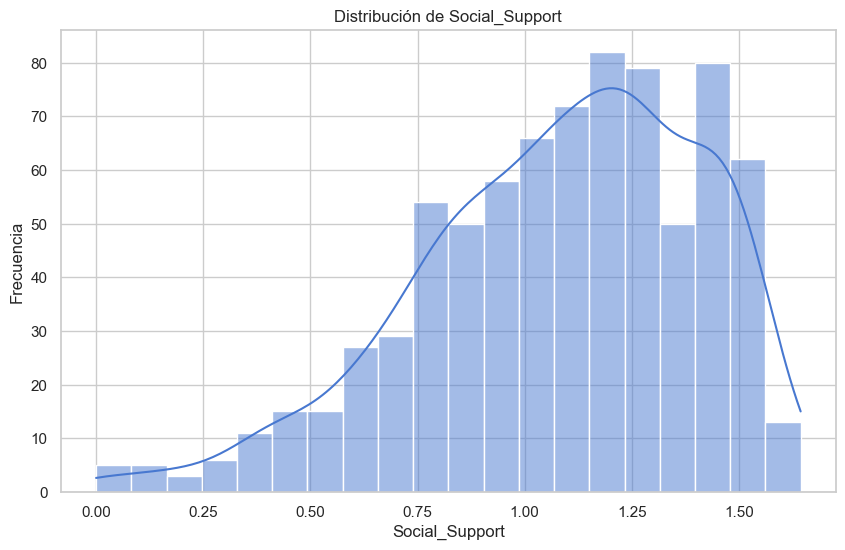

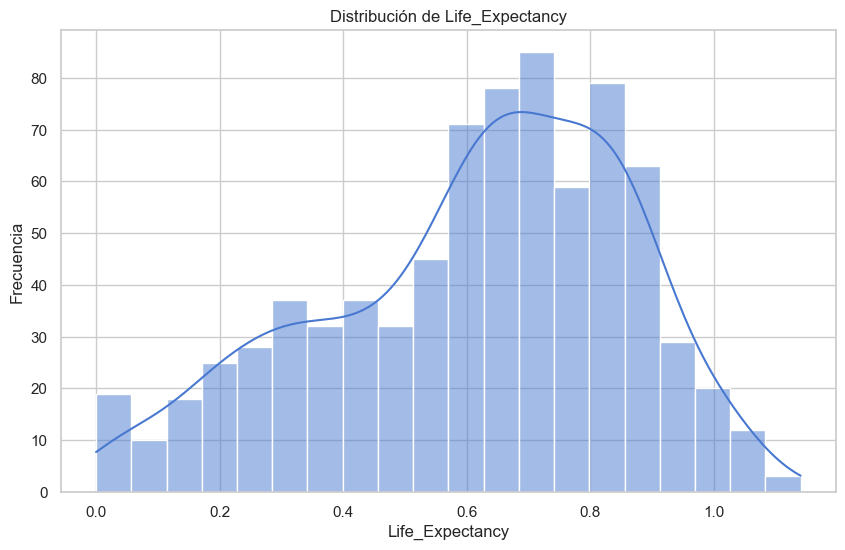

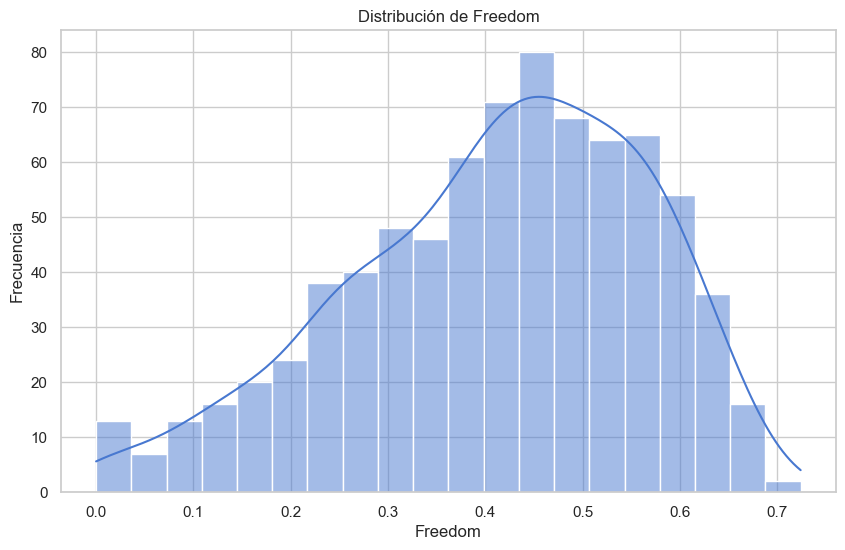

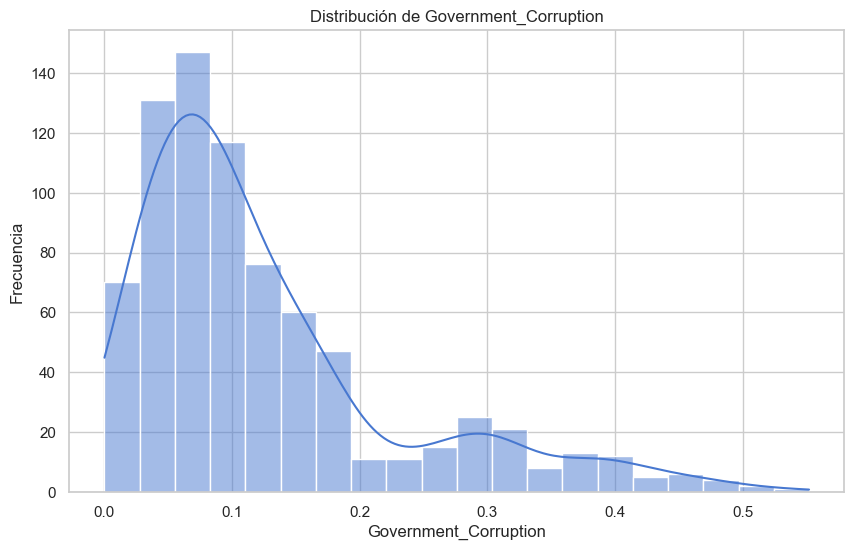

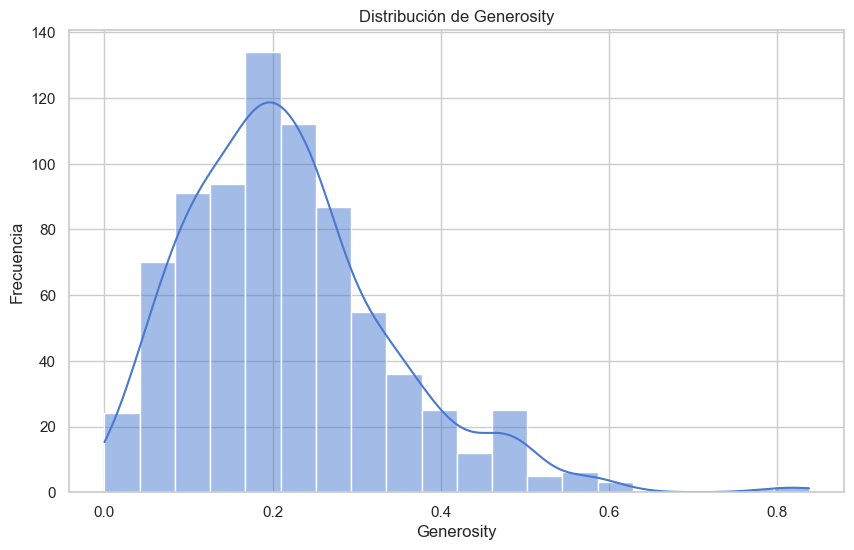

In [89]:
num_cols = ['Happiness_Score', 'GDP_per_Capita', 'Social_Support',
            'Life_Expectancy', 'Freedom', 'Government_Corruption', 'Generosity']

# Histogramas y densidades
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

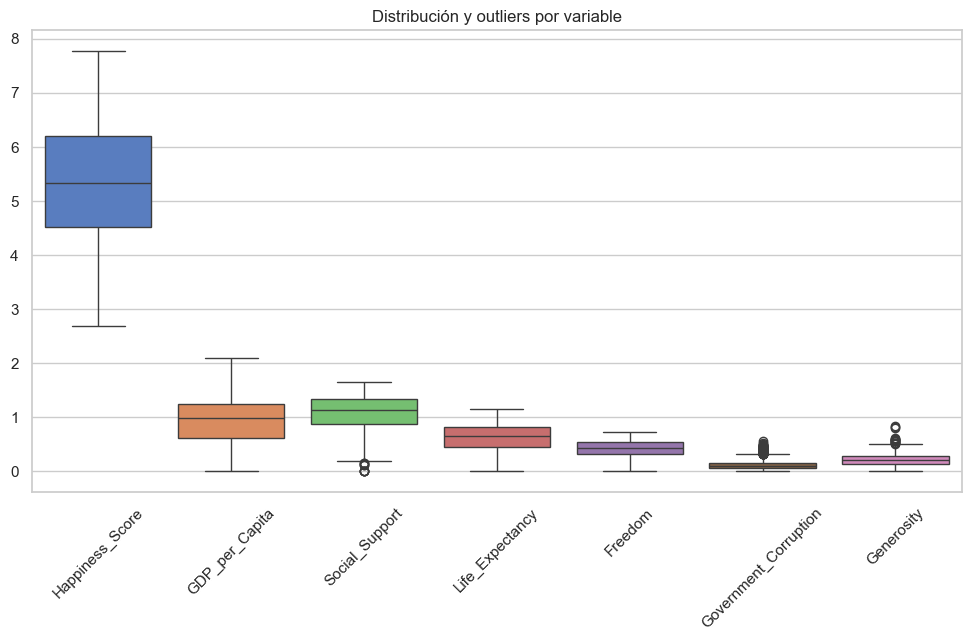

In [90]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title('Distribución y outliers por variable')
plt.xticks(rotation=45)
plt.show()

# **CORRELACIONES Y RELACIONES BIVARIADAS**

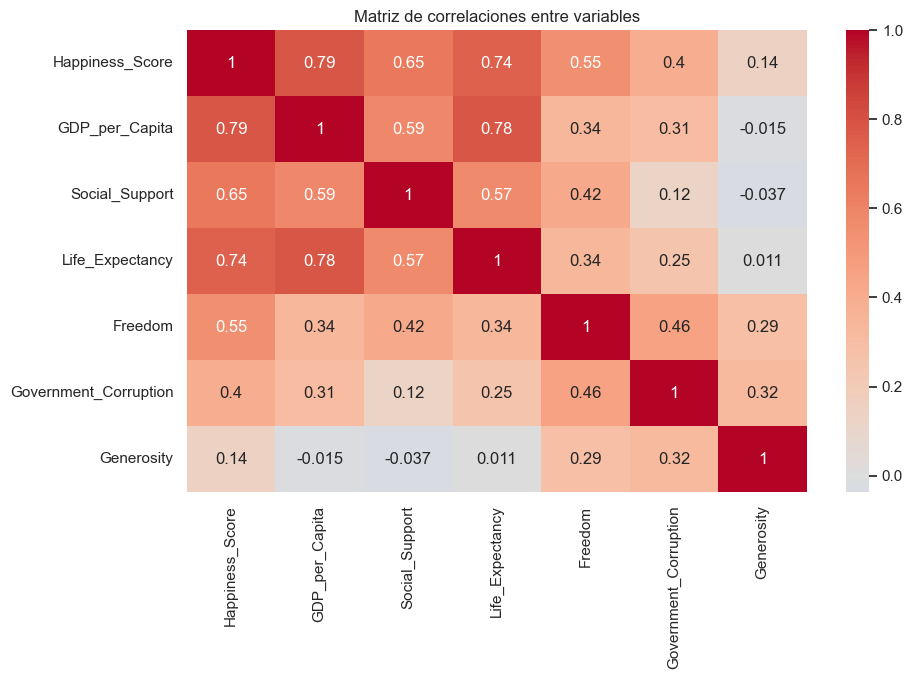

In [91]:
# Matriz de correlación
corr = df[num_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title('Matriz de correlaciones entre variables')
plt.show()

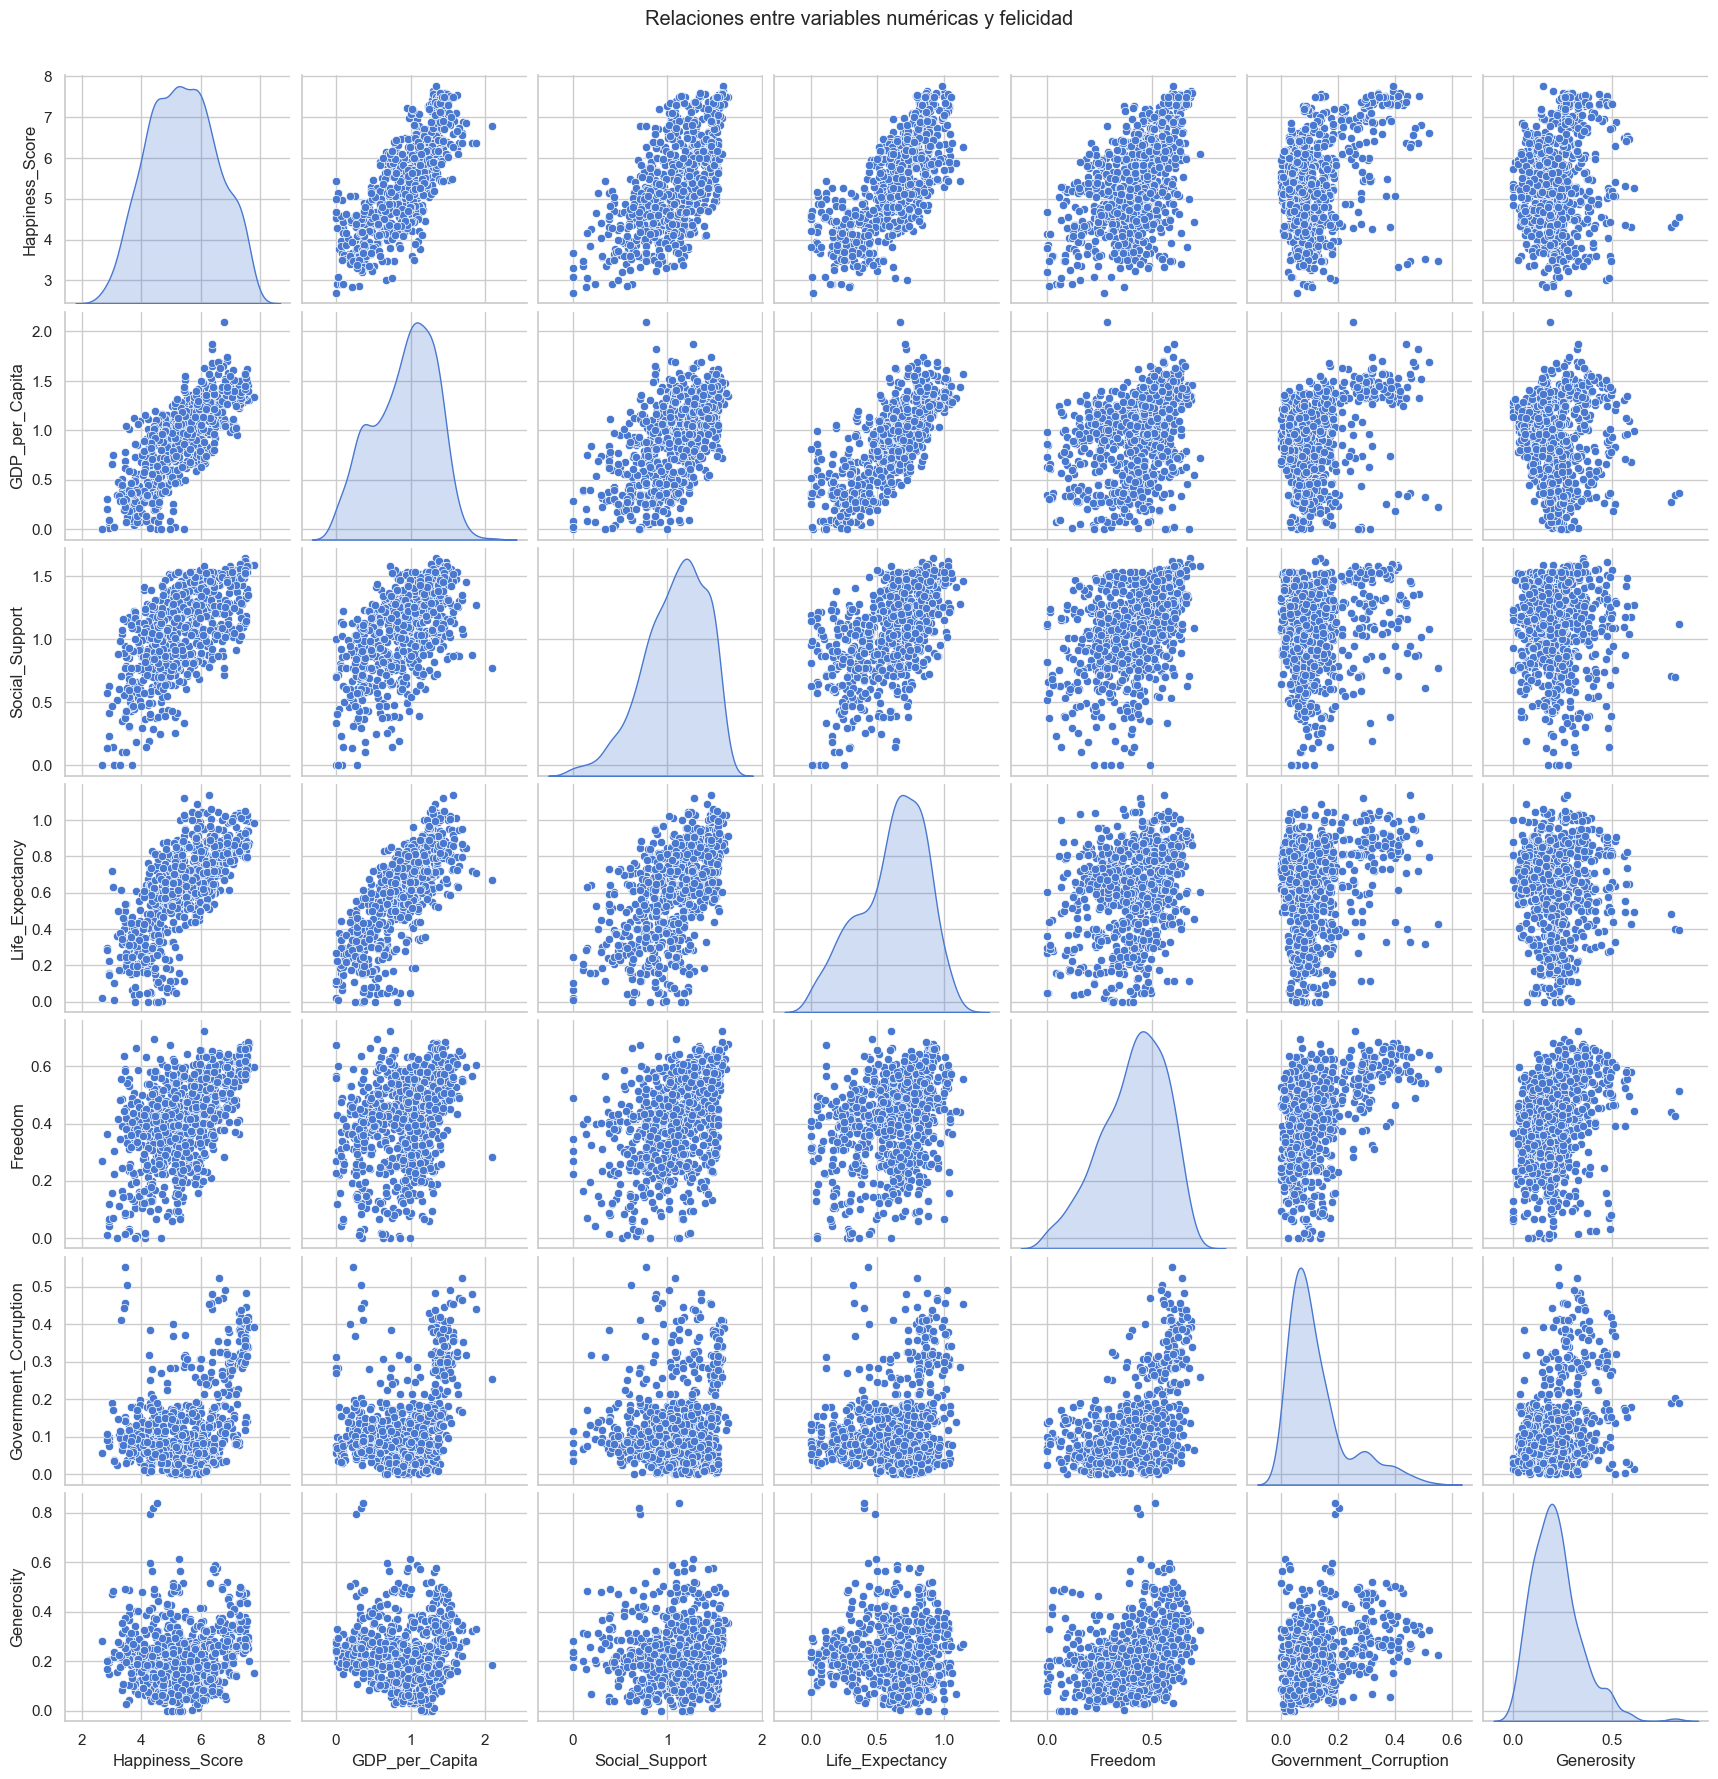

In [101]:
# Asegurar que no haya duplicados antes de pasar la lista
cols_pairplot = list(dict.fromkeys(num_cols + ['Happiness_Score']))

sns.pairplot(df[cols_pairplot], diag_kind='kde')
plt.suptitle('Relaciones entre variables numéricas y felicidad', y=1.02)
plt.show()

# **TENDENCIAS TEMPORALES**

In [96]:
df_year = df.groupby('Year')[num_cols].mean().reset_index()

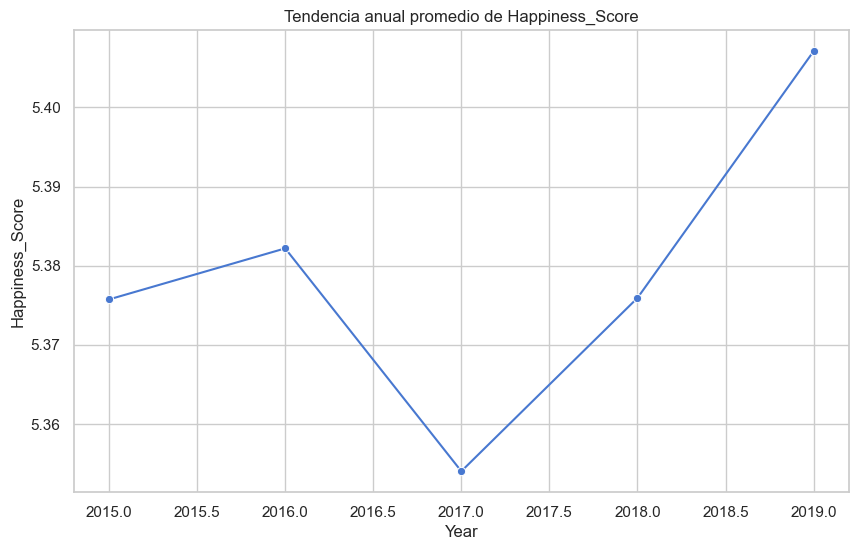

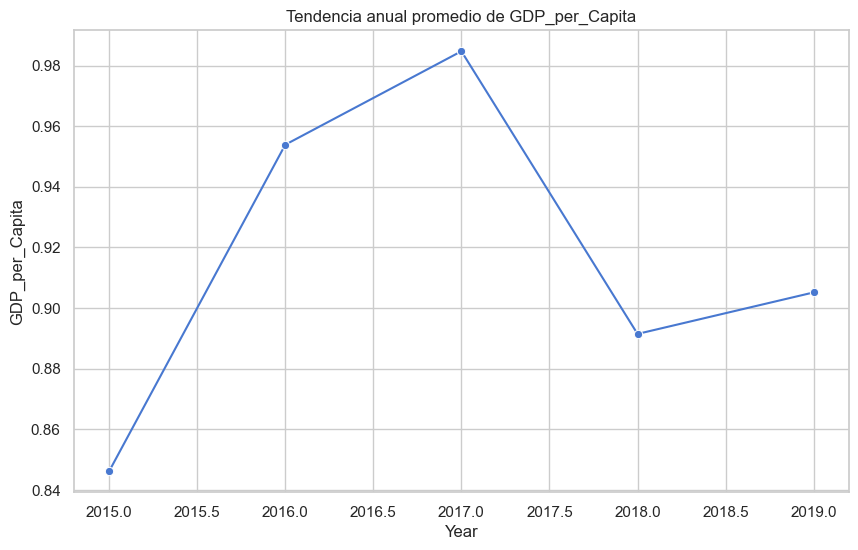

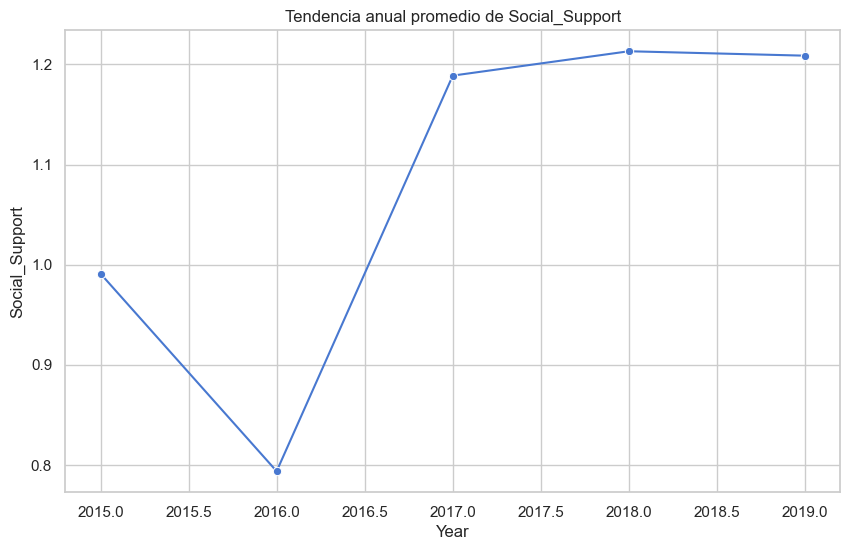

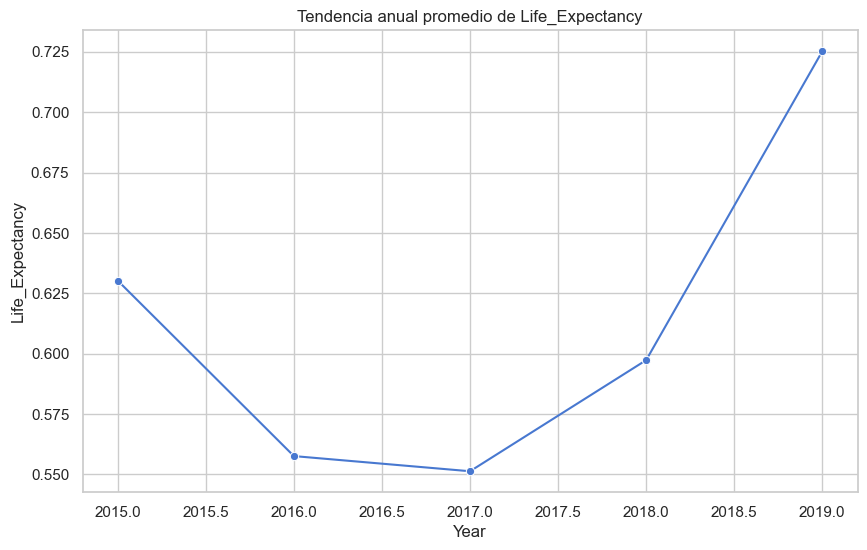

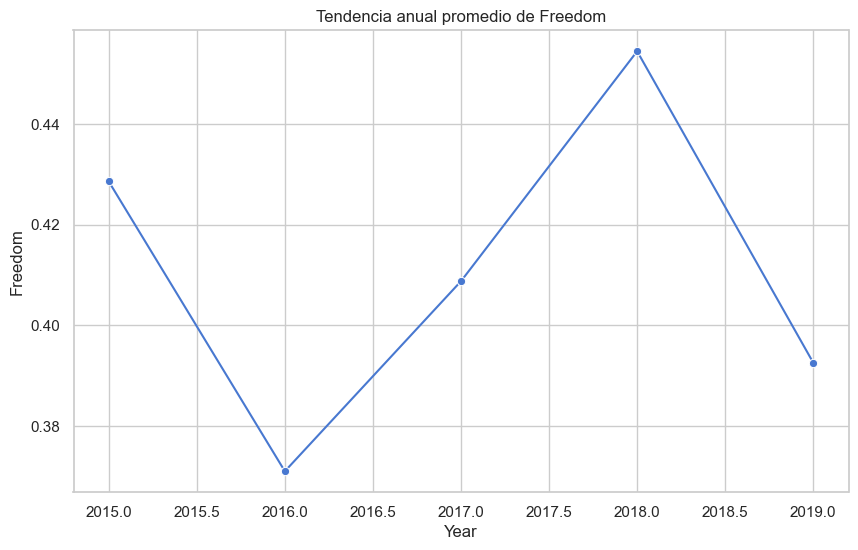

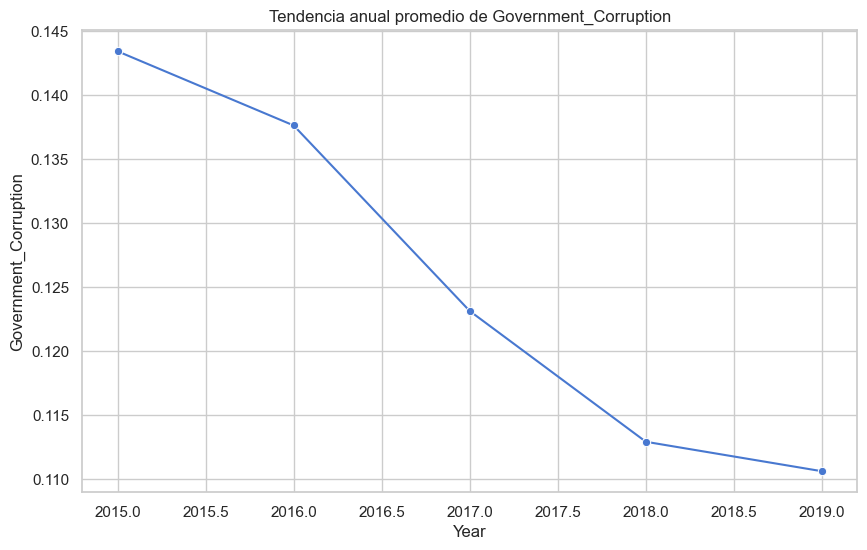

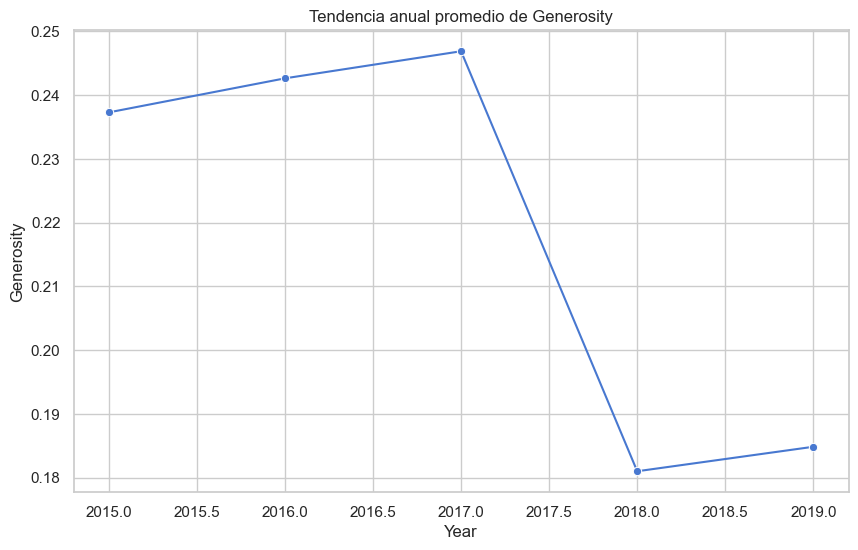

In [97]:
for col in num_cols:
    plt.figure()
    sns.lineplot(data=df_year, x='Year', y=col, marker='o')
    plt.title(f'Tendencia anual promedio de {col}')
    plt.ylabel(col)
    plt.show()

# **RELACIONES CLAVE CON LA FELICIDAD**

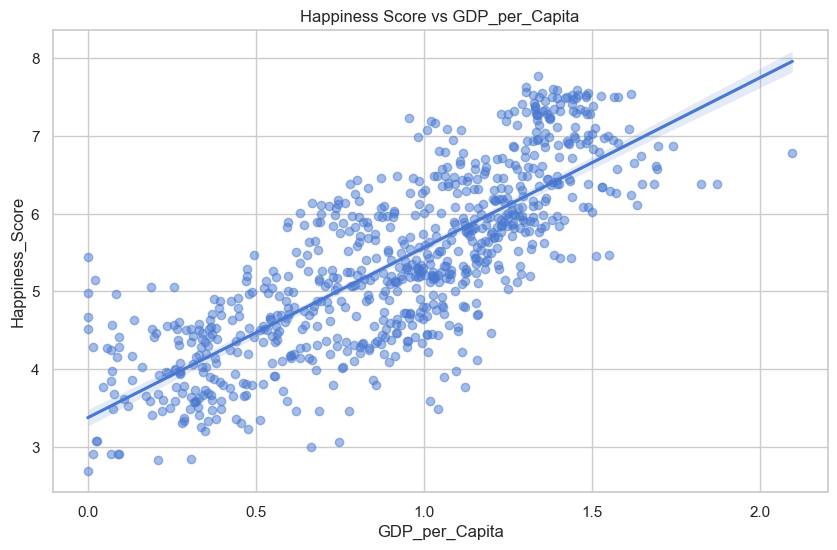

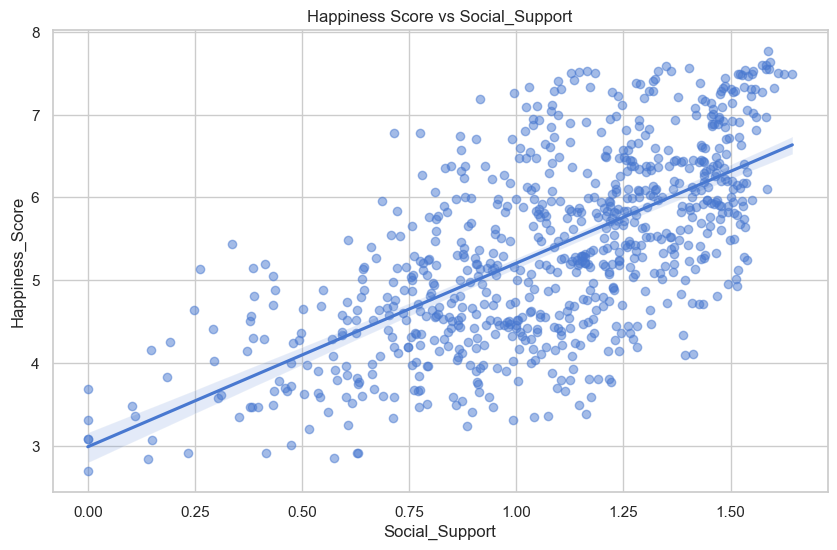

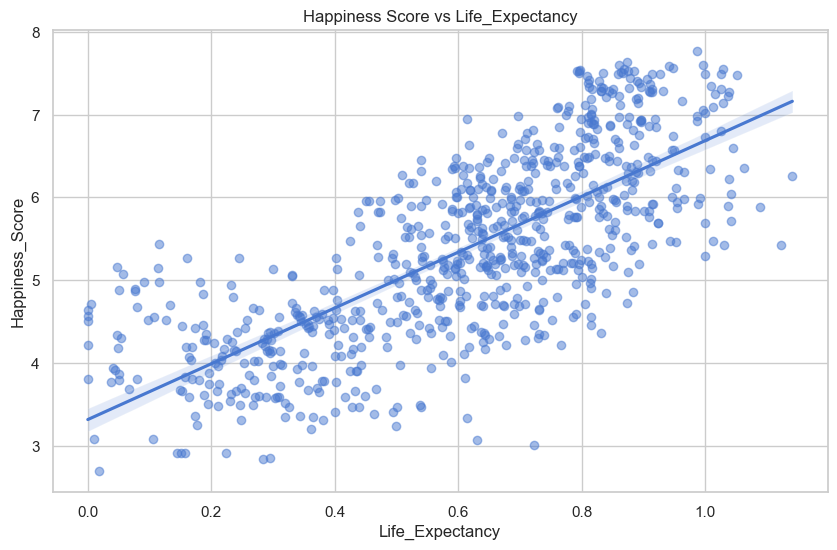

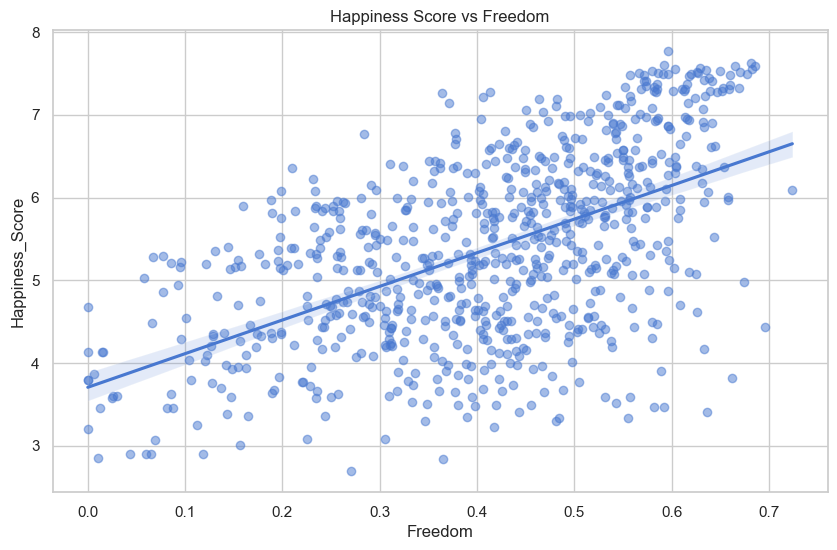

In [98]:
# Regresiones simples
for col in ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom']:
    plt.figure()
    sns.regplot(data=df, x=col, y='Happiness_Score', scatter_kws={'alpha':0.5})
    plt.title(f'Happiness Score vs {col}')
    plt.show()

# **ANÁLISIS POR PAÍS**

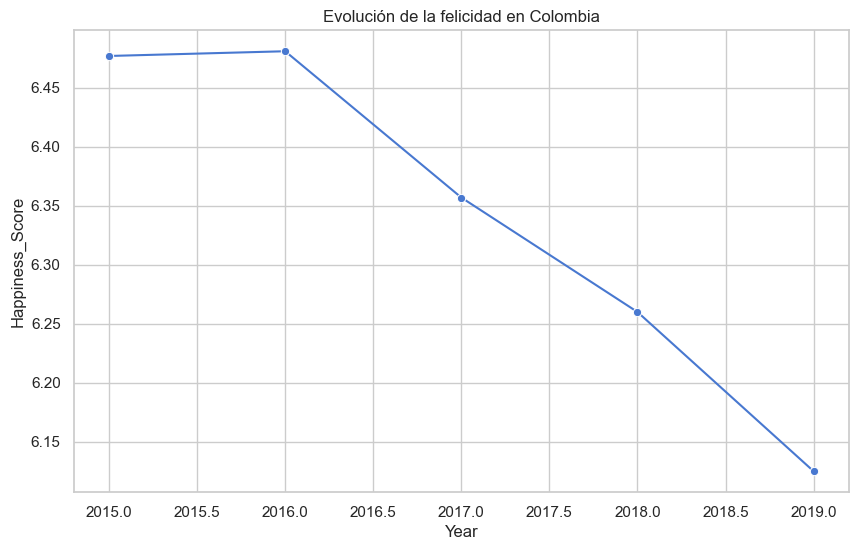

In [99]:
country = 'Colombia'  # puedes cambiarlo
df_country = df[df['Country'] == country]

plt.figure()
sns.lineplot(data=df_country, x='Year', y='Happiness_Score', marker='o')
plt.title(f'Evolución de la felicidad en {country}')
plt.show()

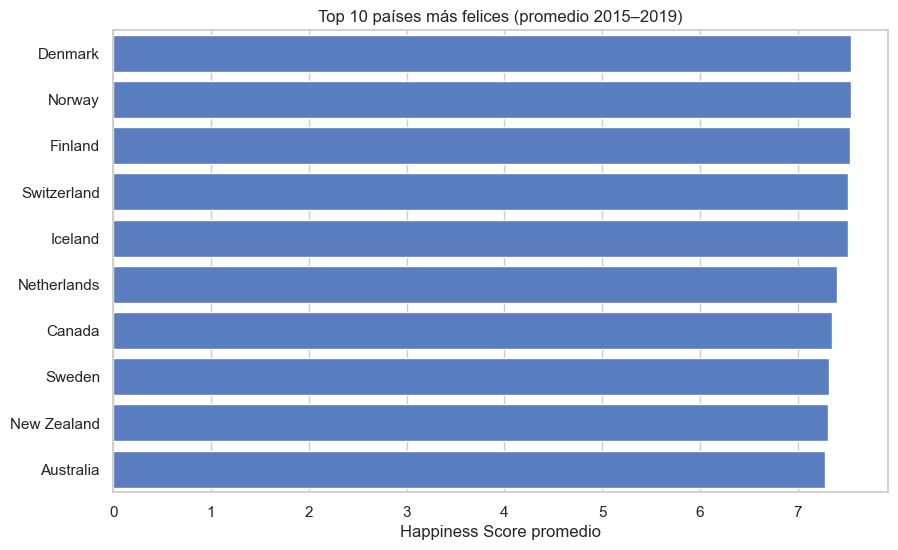

In [100]:
df_country_mean = df.groupby('Country')['Happiness_Score'].mean().sort_values(ascending=False).head(10)

plt.figure()
sns.barplot(x=df_country_mean.values, y=df_country_mean.index)
plt.title('Top 10 países más felices (promedio 2015–2019)')
plt.xlabel('Happiness Score promedio')
plt.ylabel('')
plt.show()